In [5]:
from sklearn.datasets import make_regression
import numpy as np

In [6]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)

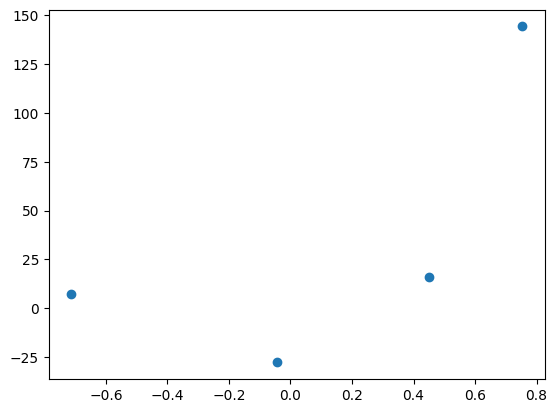

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [8]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [9]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [10]:
reg.coef_

array([78.35063668])

In [11]:
reg.intercept_

26.15963284313262

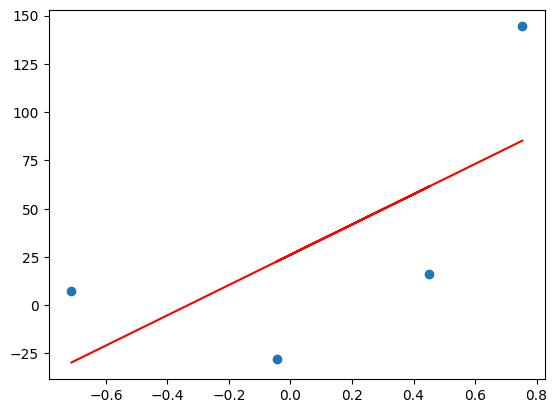

In [12]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [13]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((78.35 * X) + 0).reshape(4)

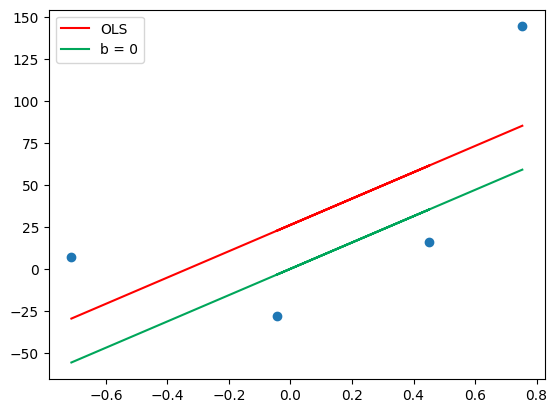

In [14]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [15]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-209.27763408209216

In [16]:
# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size

-20.927763408209216

In [17]:
# Calculating the new intercept
b = b - step_size
b

20.927763408209216

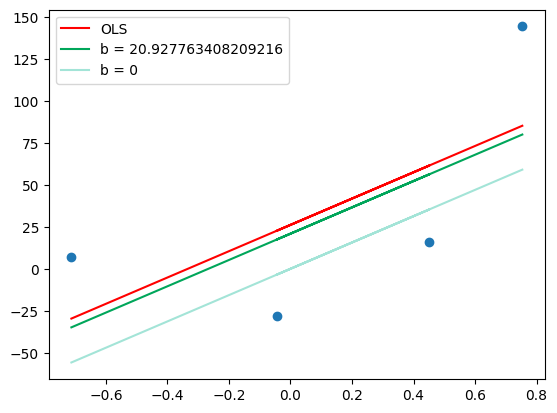

In [18]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [19]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-41.85552681641843

In [20]:
step_size = loss_slope*lr
step_size

-4.185552681641844

In [21]:
b = b - step_size
b

25.11331608985106

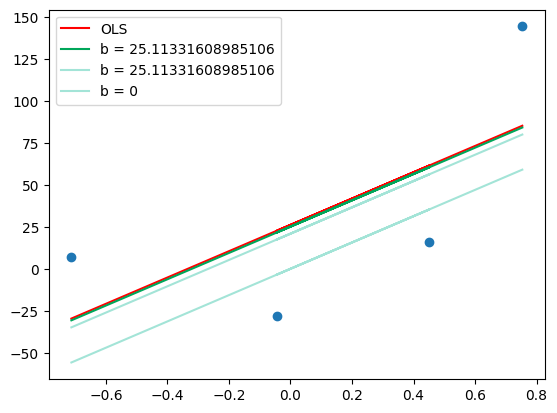

In [22]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [23]:
# Iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-8.371105363283675

In [24]:
step_size = loss_slope*lr
step_size

-0.8371105363283675

In [25]:
b = b - step_size
b

25.95042662617943

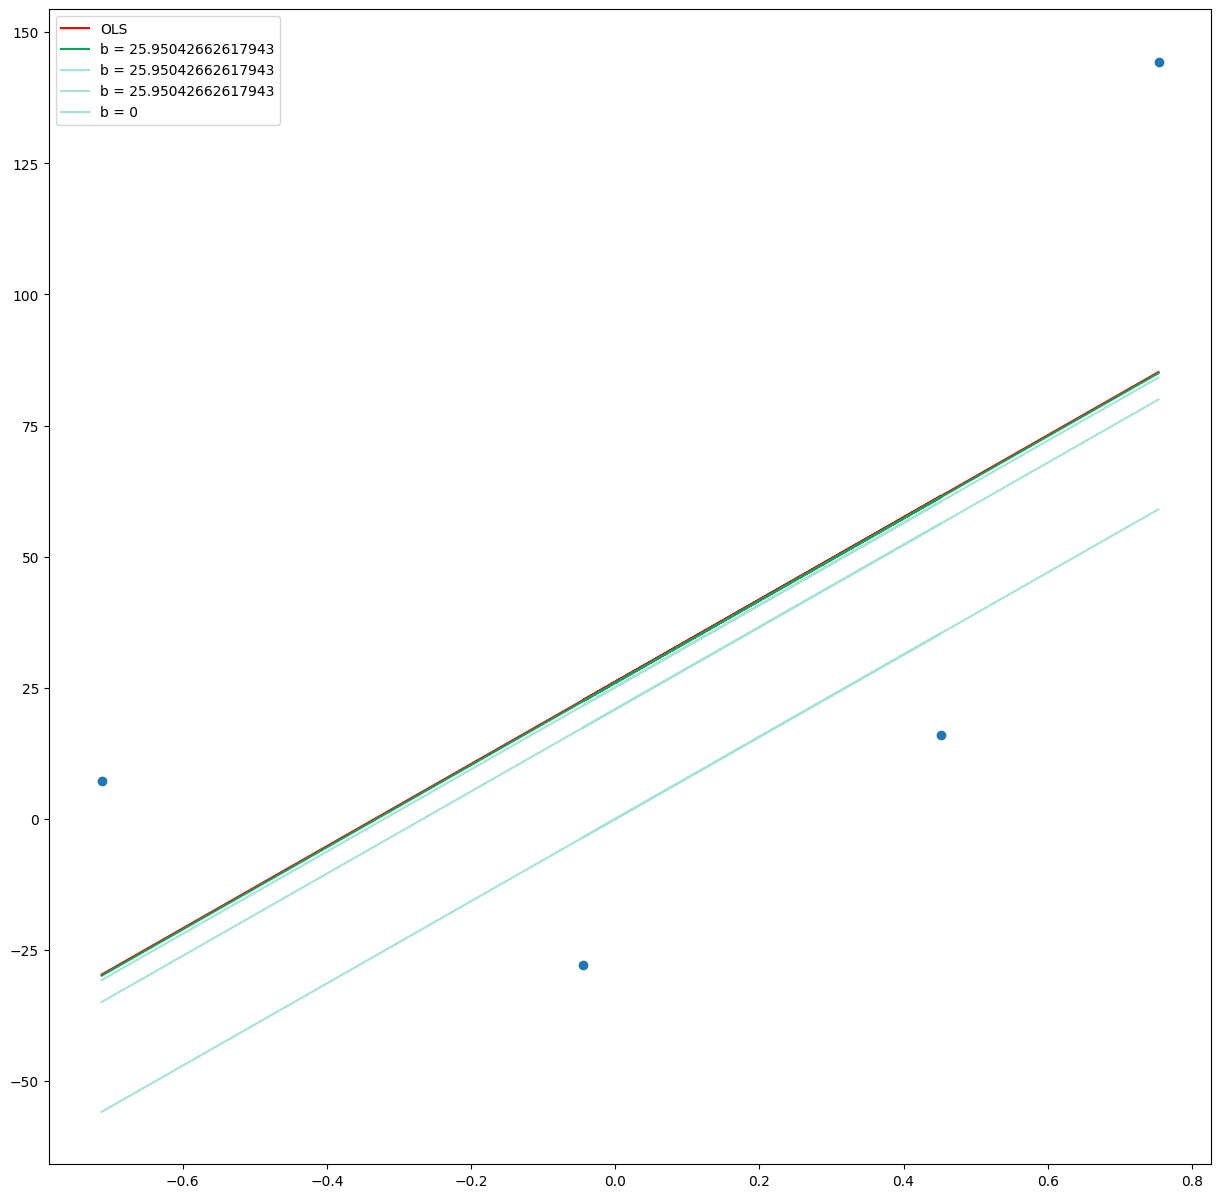

In [26]:
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

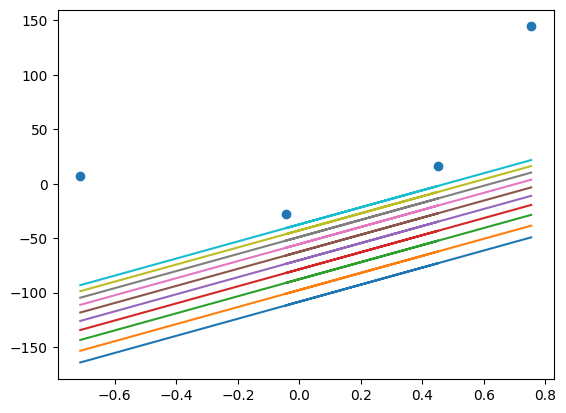

In [27]:
b = -120
m = 78.35
lr = 0.01

epochs = 10

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)

Optimal value of x: [1.23023192e-97 0.00000000e+00]
Optimal value of objective function: 1.5134705823042444e-194


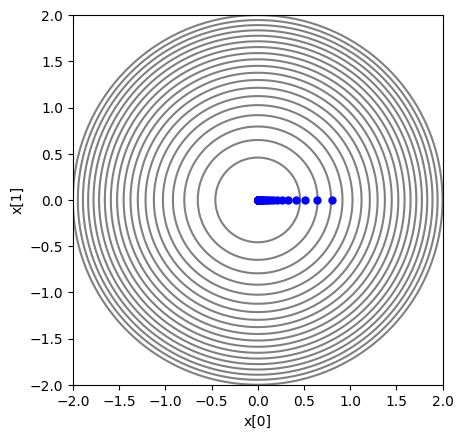

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function to minimize
def obj_func(x):
    return x[0]**2 + x[1]**2

# Define the gradient of the objective function
def grad_func(x):
    return np.array([2 * x[0], 2 * x[1]])

# Set the initial guess for x and choose the step size and the maximum number of iterations
x0 = np.array([1, 0])
step_size = 0.1
max_iter = 1000

# Create a meshgrid for plotting
X, Y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

# Evaluate the objective function on the meshgrid
Z = X**2 + Y**2

# Plot the objective function
fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels=np.linspace(0, 4, 20), colors='gray')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
ax.set_aspect('equal')

# Iterate over the optimization problem and update the plot at each step
for i in range(max_iter):
    # Calculate the gradient of the objective function at the current estimate of x
    grad = grad_func(x0)

    # Update the estimate of x using the gradient and the step size
    x0 = x0 - step_size * grad

    # Plot the current estimate of x on the contour plot
    ax.plot(x0[0], x0[1], 'bo', markersize=5)

# Print the optimal value of x and the optimal value of the objective function
print(f"Optimal value of x: {x0}")
print(f"Optimal value of objective function: {obj_func(x0)}")

plt.show()


Optimal value of x: [-0.56105356 -0.56105356]
Optimal value of objective function: 1.3781047609743087


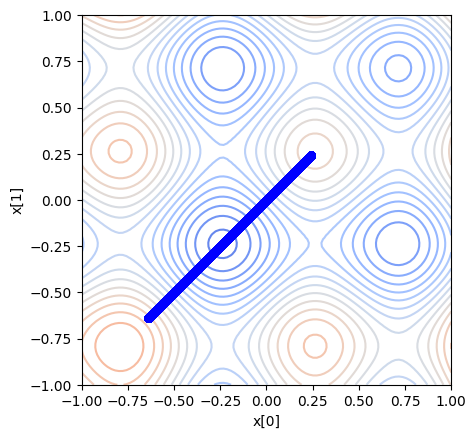

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function to minimize
def obj_func(x):
    return x[0]**2 + x[1]**2 + np.sin(2 * np.pi * x[0]) + np.sin(2 * np.pi * x[1])

# Define the gradient of the objective function
def grad_func(x):
    return np.array([2 * x[0] + 2 * np.pi * np.cos(2 * np.pi * x[0]), 
                     2 * x[1] + 2 * np.pi * np.cos(2 * np.pi * x[1])])

# Set the initial guess for x and choose the step size and the maximum number of iterations
x0 = np.array([0, 0])
step_size = 0.1
max_iter = 10000

# Create a meshgrid for plotting
X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

# Evaluate the objective function on the meshgrid
Z = X**2 + Y**2 + np.sin(2 * np.pi * X) + np.sin(2 * np.pi * Y)

# Plot the objective function
fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels=np.linspace(-3, 6, 30), cmap='coolwarm')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
ax.set_aspect('equal')

# Iterate over the optimization problem and update the plot at each step
for i in range(max_iter):
    # Calculate the gradient of the objective function at the current estimate of x
    grad = grad_func(x0)

    # Update the estimate of x using the gradient and the step size
    x0 = x0 - step_size * grad

    # Plot the current estimate of x on the contour plot
    ax.plot(x0[0], x0[1], 'bo', markersize=5)

# Print the optimal value of x and the optimal value of the objective function
print(f"Optimal value of x: {x0}")
print(f"Optimal value of objective function: {obj_func(x0)}")

plt.show()


Iteration 0: loss = 1420699129988310.8
Iteration 1000: loss = nan
Iteration 2000: loss = nan
Iteration 3000: loss = nan
Iteration 4000: loss = nan


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_19963/4110691388.py:39: RuntimeWarning: invalid value encountered in subtract
  theta0 = theta0 - step_size * grad


Iteration 5000: loss = nan
Iteration 6000: loss = nan
Iteration 7000: loss = nan
Iteration 8000: loss = nan
Iteration 9000: loss = nan
Optimal values of theta: [nan nan]
Optimal value of loss function: nan


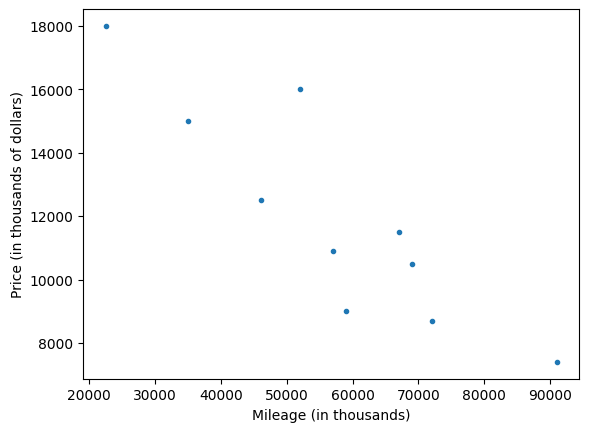

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('car_prices.csv')

# Define the independent variable (mileage) and the dependent variable (price)
mileage = data['Mileage'].values
price = data['Price'].values

# Define the linear regression model
def predict_price(mileage, theta):
    return theta[0] + theta[1] * mileage

# Define the mean squared error (MSE) loss function
def mse_loss(mileage, price, theta):
    y_pred = predict_price(mileage, theta)
    return np.mean((y_pred - price)**2)

# Define the gradient of the MSE loss function with respect to theta
def grad_mse_loss(mileage, price, theta):
    y_pred = predict_price(mileage, theta)
    grad0 = np.mean(y_pred - price)
    grad1 = np.mean((y_pred - price) * mileage)
    return np.array([grad0, grad1])

# Set the initial guess for the parameters of the linear regression model and choose the step size and the maximum number of iterations
theta0 = np.array([0, 0])
step_size = 1e-6
max_iter = 10000

# Iterate over the optimization problem
for i in range(max_iter):
    # Calculate the gradient of the MSE loss function at the current estimate of theta
    grad = grad_mse_loss(mileage, price, theta0)

    # Update the estimate of theta using the gradient and the step size
    theta0 = theta0 - step_size * grad

    # Print the current value of the loss function every 1000 iterations
    if i % 1000 == 0:
        loss = mse_loss(mileage, price, theta0)
        print(f"Iteration {i}: loss = {loss}")

# Print the optimal values of theta and the optimal value of the loss function
print(f"Optimal values of theta: {theta0}")
print(f"Optimal value of loss function: {mse_loss(mileage, price, theta0)}")

# Plot the data and the linear regression model
fig, ax = plt.subplots()
ax.scatter(mileage, price, marker='.')
ax.plot(mileage, predict_price(mileage, theta0), color='red')
ax.set_xlabel('Mileage (in thousands)')
ax.set_ylabel('Price (in thousands of dollars)')

plt.show()
